

## 1. Order Scenarios
1. Overall sales of the product.
2. Correlation between different types of products.
3. Predict on the time spent for fulfilling an order.
4. The distribution of time that takes for fulfilling an order.

#### Order Scenario 1: Overall sales of the product

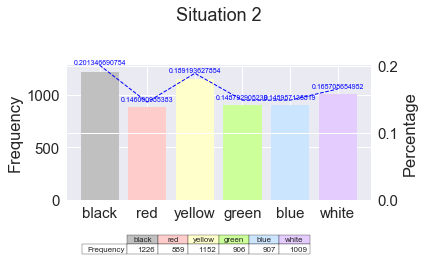

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import csv


data = {}
with open('../data/exp3/order/new_ws_orderinfo_orders_server.csv', 'rb') as pscfile:
    reader = csv.DictReader(pscfile)
    for row in reader:
        if not row['id'] in (None, ""):
            data[row['id']] = {k:v for k,v in row.items() if k <> 'id'}

        
with open('../data/exp3/new/ws_orderinfo_orders_server.csv', 'rb') as pscfile:
    reader = csv.DictReader(pscfile)
    for row in reader:
        if not row['id'] in (None, ""):
            data[row['id']] = {k:v for k,v in row.items() if k <> 'id'}
        
        
labels = 'black', 'red', 'yellow', 'green', 'blue', 'white'
colors = ['#C0C0C0','#FFCCCC','#FFFFCC','#ccff99','#CCE5FF','#E5CCFF']
product = {'black':0, 'red':0, 'yellow':0, 'green':0, 'blue':0, 'white':0}

for key, val in data.items():
    for orderKey, orderVal in val.items():
        if orderKey in product:
            product[orderKey] += int(orderVal)

cellText = []
for i in labels:
    cellText.append(product[i])

percentage = []
sumOrder = 0
for i in cellText:
    sumOrder += i

for i in cellText:
    percentage.append(float(i)/float(sumOrder))


fig, (title, ax, ax1) = plt.subplots(nrows=3, ncols=1, gridspec_kw = {'height_ratios':[0.1, 9, 1]})
# title
title.axis('off')
title.set_title('Situation 2')

# bar chart
ax.bar(labels, cellText, color=colors)
ax.set_ylabel('Frequency')

# line chart
ax2 = ax.twinx()
ax2.plot(labels, percentage, "b--", linewidth=1)
ax2.set_ylabel('Percentage')
ax2.set_ylim(0, max(percentage))
for a, b in zip(labels, percentage):  
    plt.text(a, b, b, ha='center', va='bottom', fontsize=7, color='blue')  

# table
the_table = ax1.table(cellText=[cellText],
                      rowLabels=['Frequency'],
                      colColours=colors,
                      colLabels=labels,
                      colWidths=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                      loc='center')
ax1.axis('off')
plt.subplots_adjust(top=0.8, bottom=0.2)
plt.tight_layout()
plt.show()

#### Order Scenario 2: Correlation between different types of products.

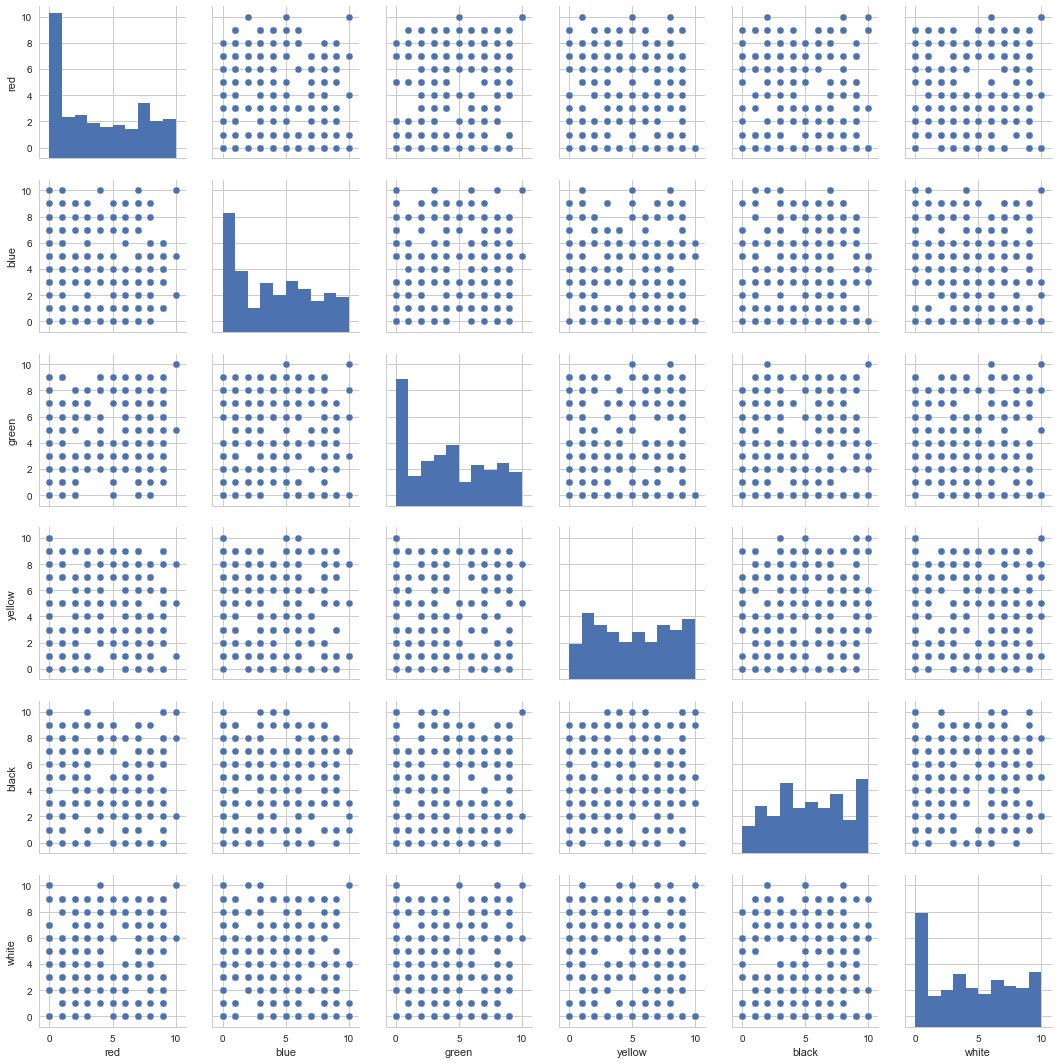

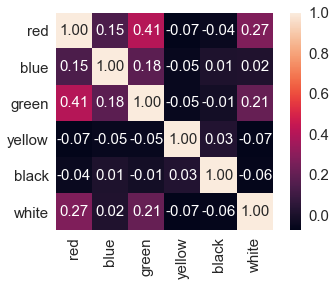

In [53]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("../data/exp3/order/new_ws_orderinfo_orders_server.csv")
df2 = pd.read_csv("../data/exp3/new/ws_orderinfo_orders_server.csv")


df3 = df.append(df2, ignore_index=True)


# Scatter Plot - color vs color
sns.set(style='whitegrid', context='notebook')
cols = ['red', 'blue', 'green', 'yellow', 'black','white']
sns.pairplot(df3[cols], size=2.5)
plt.show()

# Correlation Matrix - color vs color
cm = np.corrcoef(df3[cols].values.T) 
sns.set(font_scale=1.5) 
hm = sns.heatmap(cm, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 15}, 
                 yticklabels=cols, 
                 xticklabels=cols) 
plt.show()

#### Order Scenario 4: The distribution of time that takes for fulfilling an order.

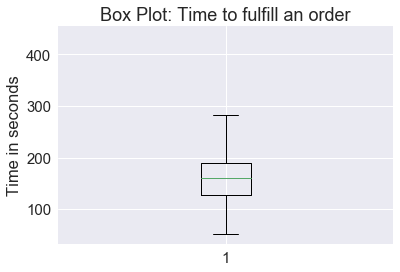

In [25]:
import csv
import datetime
import numpy as np
import matplotlib.pyplot as plt

# Here is the data read from the csv file
results = []

with open('../data/exp3/order/new_ws_orderinfo_orders_server.csv', 'rb') as pscfile:
    reader = csv.DictReader(pscfile)
    for row in reader:
        if not row['id'] in (None, ""):
            shipdate = datetime.datetime.strptime(row['shipdate'], "%Y-%m-%d %H:%M:%S")
            takendate = datetime.datetime.strptime(row['tokendate'], "%Y-%m-%d %H:%M:%S")
            results.append((shipdate - takendate).total_seconds())
with open('../data/exp3/new/ws_orderinfo_orders_server.csv', 'rb') as pscfile:
    reader = csv.DictReader(pscfile)
    for row in reader:
        if not row['id'] in (None, ""):
            shipdate = datetime.datetime.strptime(row['shipdate'], "%Y-%m-%d %H:%M:%S")
            takendate = datetime.datetime.strptime(row['tokendate'], "%Y-%m-%d %H:%M:%S")
            results.append((shipdate - takendate).total_seconds())

            
# Box plot
fig, ax = plt.subplots()
ax.set_title('Box Plot: Time to fulfill an order')
ax.set_ylabel('Time in seconds')
ax.boxplot(results)
plt.show()


## 2. User scenario: 
1. Preference of type of product for a certain user, which is measured on the number of products of the specific type that the user has purchased. 
*Use the new order data generated from order1.jar*

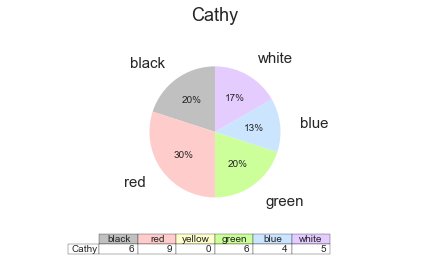

In [27]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import csv

# Here is the order id you want to visualize
order_id = '105'

# Here is the data read from csv file
data = {}
with open('../data/exp3/new/ws_orderinfo_orders_server.csv', 'rb') as pscfile:
    reader = csv.DictReader(pscfile)
    for row in reader:
      data[row['id']] = {k:v for k,v in row.items() if k <> 'id'}

# Here is the lable of the order
labels = ['black', 'red', 'yellow', 'green', 'blue', 'white']

# Here is the style of the pie chart
colors = ['#C0C0C0','#FFCCCC','#FFFFCC','#ccff99','#CCE5FF','#E5CCFF']


fracs = []
row1 = data[order_id]
customer = row1['customer']
for i in labels:
	fracs.append(row1[i])

# Plot assignment & Title
fig, (title, ax, ax1) = plt.subplots(nrows=3, ncols=1, gridspec_kw = {'height_ratios':[0.1, 9, 1]})
title.axis('off')
title.set_title(customer)


# pie chart
pieLabels = []
pieFracs = []
pieColors = []
count = -1
for i in fracs:
	count += 1
	if i != '0':
		pieFracs.append(i)
		pieLabels.append(labels[count])
		pieColors.append(colors[count])

ax.pie(pieFracs, labels=pieLabels, colors=pieColors, autopct='%.0f%%', shadow=False, startangle=90, labeldistance=1.3)
ax.axis('equal')


# Table
cellText = [fracs]
the_table = ax1.table(cellText=[fracs],
                      rowLabels=[customer],
                      colColours=colors,
                      colLabels=labels,
                      colWidths=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                      loc='center')
ax1.axis('off')

# plot
plt.subplots_adjust(top=0.8, bottom=0.2)
plt.tight_layout()
plt.show()

## 3. Prediction
Order Scenario 3: Predict on the time spent for fulfilling an order.Models implemented including:
1. Simple linear regression
2. SGD linear regression (implemented class)
3. SGD linear regression (sklearn)
4. Polynomial linear regression
5. Polynomial SGD linear regression
6. Multi-feature linear regression
7. Multi-feature OLS
8. Multi-feature linear regression with PCA (90% info maintained)
9. Multi-feature SGD linear regression
10. Multi feature SGD linear regression with PCA (90% info maintained)

P-value of features could be found in the summary of 7. Multi-feature OLS.

In [79]:
%matplotlib inline
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../data/exp3/order/new_ws_orderinfo_orders_server.csv', header=0)
df2 = pd.read_csv('../data/exp3/new/ws_orderinfo_orders_server.csv', header=0)

df3 = df.append(df2, ignore_index=True)

filtered_df3 = df3[df3['orderdate'].isnull()]
df3 = df3.dropna()
df3["orderdate"] = df3["orderdate"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df3["tokendate"] = df3["tokendate"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df3["shipdate"] = df3["shipdate"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df3["transitDuration"] = (df3["shipdate"]-df3["tokendate"])/ np.timedelta64(1, 's')
df3["fulfillDuration"] = (df3["shipdate"]-df3["orderdate"])/ np.timedelta64(1, 's')

df3["amount"] = df3["red"]+df3["blue"]+df3["yellow"]+df3["black"]+df3["white"]
df3.head()


,id,customer,red,blue,green,yellow,black,white,pending,orderdate,tokendate,shipdate,shipped,transitDuration,fulfillDuration,amount
0,1,Sherrie,9,3,7,8,6,0,0,2018-06-18 16:08:37,2018-06-18 16:08:37,2018-06-18 16:12:26,1,229.0,229.0,26
1,2,Dan,10,2,5,1,8,10,0,2018-06-18 16:08:37,2018-06-18 16:10:09,2018-06-18 16:14:10,1,241.0,333.0,31
2,3,Erma,1,6,6,8,2,8,0,2018-06-18 16:08:37,2018-06-18 16:12:15,2018-06-18 16:17:02,1,287.0,505.0,25
3,4,Sharon,5,8,4,9,9,2,0,2018-06-18 16:08:37,2018-06-18 16:15:48,2018-06-18 16:18:21,1,153.0,584.0,33
4,5,Sherrie,6,3,3,0,1,8,0,2018-06-18 16:08:37,2018-06-18 16:16:47,2018-06-18 16:19:13,1,146.0,636.0,18


In [69]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    return

### Simple linear regression

Slope: 0.406
Intercept: -0.000
Correlation: 0.164


/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


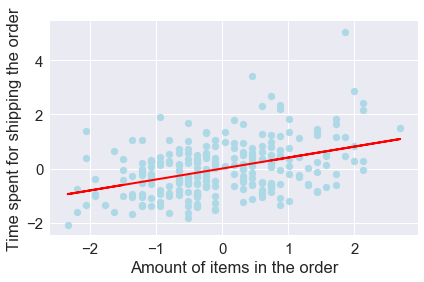

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


X = df3[["amount"]].values
y=df3[["transitDuration"]].values

# preprocess data
scaler = StandardScaler()
X = scaler.fit_transform(X)
scaler = StandardScaler()
y = scaler.fit_transform(y).flatten()

# train and predict
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)
print('Correlation: %.3f' % slr.score(X, y))
lin_regplot(X, y, slr)
plt.xlabel('Amount of items in the order')
plt.ylabel('Time spent for shipping the order')
plt.tight_layout()
plt.show()

### Linear Regression with SGD

/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


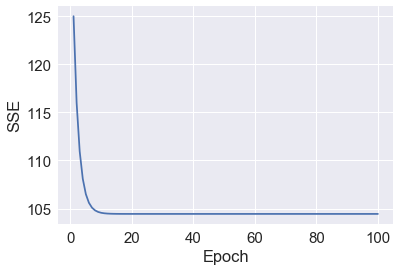

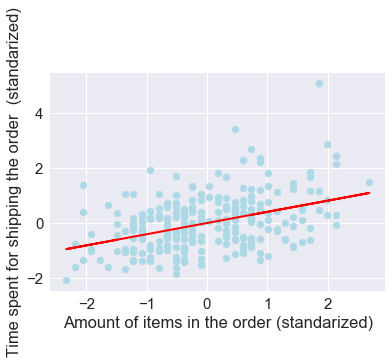

Slope: 0.406
Intercept: -0.000
R^2 Score: 0.164


In [71]:
# applying the Gradient Descent to Linear Regression to train the model and use it to predict the price of a house
# given the number of rooms; essentially teh model will be trained using the actually observed data set to produce a 
# best fit line to the data set that can then be used to predict for the unknown observations; in this demo we ave used teh model
# to predict for 5 rooms; feel free to check out the prediction for 4 rooms or any other value

class LinearRegressionGD(object) :
    
    def __init__(self, eta=0.001, n_iter=100) :
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y) :
            self.w_ = np.zeros(1 + X.shape[1])
            self.cost_ = []
            
            for i in range(self.n_iter) :
                    output = self.net_input(X)
                    errors = (y - output)
                    self.w_[1:]  += self.eta * X.T.dot(errors)
                    self.w_[0]   += self.eta * errors.sum() 
                    cost = (errors**2).sum() / 2.0
                    self.cost_.append(cost)
            return self
        
    def net_input(self, X) :
            return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X) :
            return self.net_input(X)
        
X = df3[['amount']].values
y = df3['transitDuration'].values

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
sc_x.fit(X)

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

u=((y_std - lr.predict(X_std)) ** 2).sum() 
v=((y_std - y_std.mean()) ** 2).sum()
lr.score = (1 - u/v)

plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
# plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()


def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    return


lin_regplot(X_std, y_std, lr)
plt.xlabel('Amount of items in the order (standarized)')
plt.ylabel('Time spent for shipping the order  (standarized)')
# plt.tight_layout()
# plt.savefig('./figures/gradient_fit.png', dpi=300)
plt.show()

print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])
print('R^2 Score: %.3f' % lr.score)


### SGD linear regression (sklearn)

/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


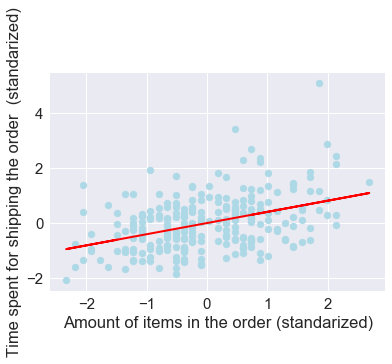

Slope: 0.405
Intercept: -0.001
R^2 Score: -8.312


In [72]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

X = df3[['amount']].values
y = df3['transitDuration'].values

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
sc_x.fit(X)

lr = SGDRegressor(learning_rate = 'invscaling', n_iter = 1000)
lr.fit(X_std, y_std)

# plt.plot(range(1, lr.n_iter_+1), lr.cost_)
# plt.ylabel('SSE')
# plt.xlabel('Epoch')
# # plt.tight_layout()
# # plt.savefig('./figures/cost.png', dpi=300)
# plt.show()


def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    return


lin_regplot(X_std, y_std, lr)
plt.xlabel('Amount of items in the order (standarized)')
plt.ylabel('Time spent for shipping the order  (standarized)')
# plt.tight_layout()
# plt.savefig('./figures/gradient_fit.png', dpi=300)
plt.show()

print('Slope: %.3f' % lr.coef_)
print('Intercept: %.3f' % lr.intercept_)
print('R^2 Score: %.3f' % lr.score(X,y))

### Polynomial linear regression

Section: Modeling nonlinear relationships in the Housing Dataset
--------------------------------------------------


/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


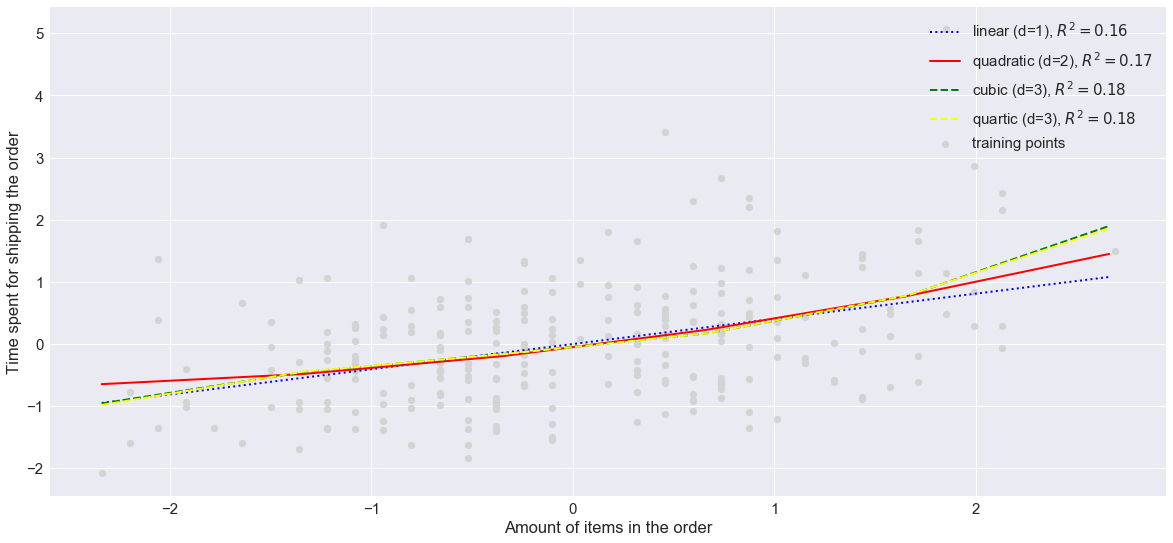

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

print(50 * '=')
print('Section: Modeling nonlinear relationships in the Housing Dataset')
print(50 * '-')

X = df3[['amount']].values
y = df3['transitDuration'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y[:, np.newaxis]).flatten()


regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
quartic = PolynomialFeatures(degree=4)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)
X_quar = quartic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

regr = regr.fit(X_quar, y)
y_quartic_fit = regr.predict(quartic.fit_transform(X_fit))
quartic_r2 = r2_score(y, regr.predict(X_quar))


# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label='linear (d=1), $R^2=%.2f$' % linear_r2,
         color='blue',
         lw=2,
         linestyle=':')

plt.plot(X_fit, y_quad_fit,
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red',
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit,
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green',
         lw=2,
         linestyle='--')

plt.plot(X_fit, y_quartic_fit,
         label='quartic (d=3), $R^2=%.2f$' % quartic_r2,
         color='yellow',
         lw=2,
         linestyle='--')

plt.xlabel('Amount of items in the order')
plt.ylabel('Time spent for shipping the order')
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = [200,9]
# plt.tight_layout()
# plt.savefig('./figures/polyhouse_example.png', dpi=300)
plt.show()

### Polynomial SGD Linear Regression

Section: Modeling nonlinear relationships in the Server Order Dataset
--------------------------------------------------


/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


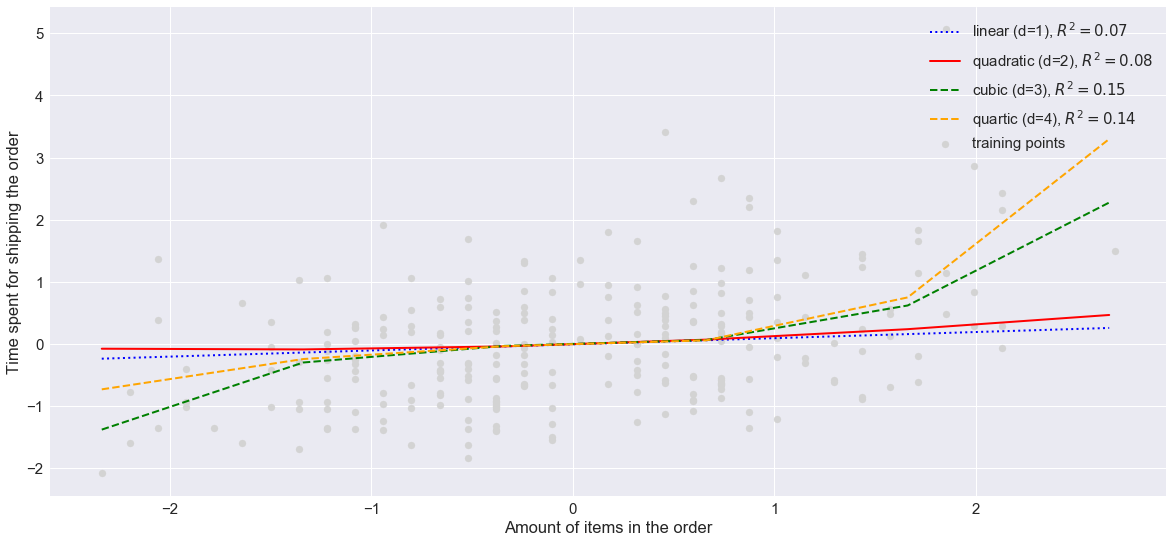

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(50 * '=')
print('Section: Modeling nonlinear relationships in the Server Order Dataset')
print(50 * '-')

X = df3[['amount']].values
y = df3['transitDuration'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y[:, np.newaxis]).flatten()

regr = SGDRegressor(learning_rate = 'invscaling', eta0 = 0.001, shuffle = False, warm_start = False )

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
quartic = PolynomialFeatures(degree=4)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)
X_quar = quartic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

regr = regr.fit(X_quar, y)
y_quartic_fit = regr.predict(quartic.fit_transform(X_fit))
quartic_r2 = r2_score(y, regr.predict(X_quar))

# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label='linear (d=1), $R^2=%.2f$' % linear_r2,
         color='blue',
         lw=2,
         linestyle=':')

plt.plot(X_fit, y_quad_fit,
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red',
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit,
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green',
         lw=2,
         linestyle='--')

plt.plot(X_fit, y_quartic_fit,
         label='quartic (d=4), $R^2=%.2f$' % quartic_r2,
         color='orange',
         lw=2,
         linestyle='--')

plt.xlabel('Amount of items in the order')
plt.ylabel('Time spent for shipping the order')
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = [20,9]
# plt.tight_layout()
# plt.savefig('./figures/polyhouse_example.png', dpi=300)
plt.show()

### Multi feature linear regression

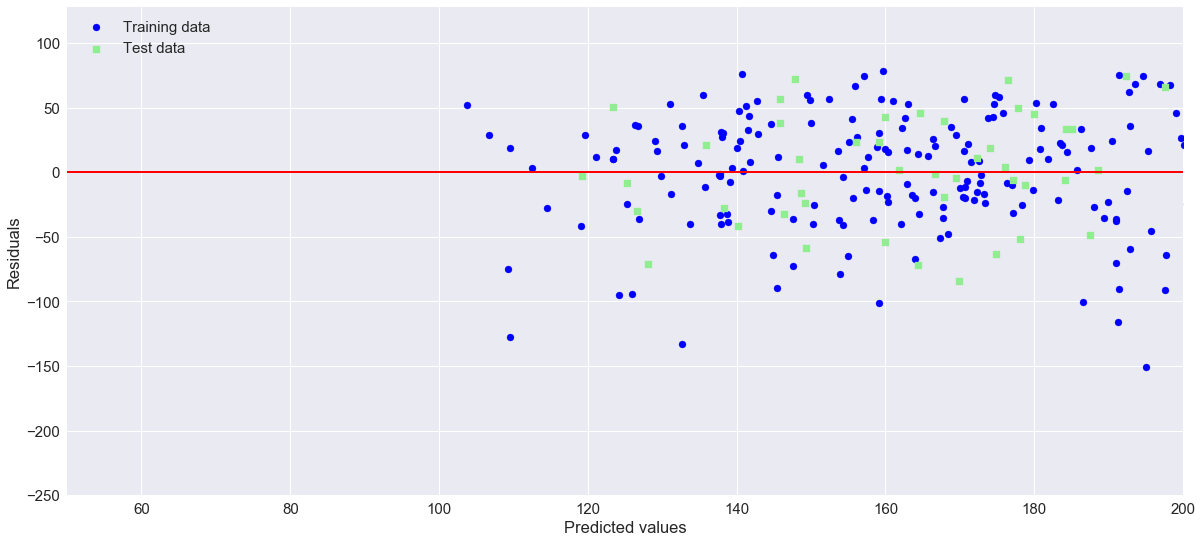

MSE train: 2415.862, test: 1662.000
R^2 train: 0.225, test: 0.129


In [81]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

index2=["red","blue","green","yellow","black","white","transitDuration"]
df1 = df3[index2]
X = df1[index2[:-1]].values
y=df1[index2[-1]].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=50, xmax=200, lw=2, color='red')
plt.xlim([50, 200])
# plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()


print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

### Multi-feature OLS

In [82]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

index2=["red","blue","green","yellow","black","white","transitDuration"]
df1 = df3[index2]
X = df1[index2[:-1]].values
y=df1[index2[-1]].values

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     11.06
Date:                Tue, 31 Jul 2018   Prob (F-statistic):           6.76e-11
Time:                        21:48:03   Log-Likelihood:                -1320.0
No. Observations:                 250   AIC:                             2654.
Df Residuals:                     243   BIC:                             2679.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.2433      9.985      9.739      0.0

###  Multi feature Linear regression with PCA

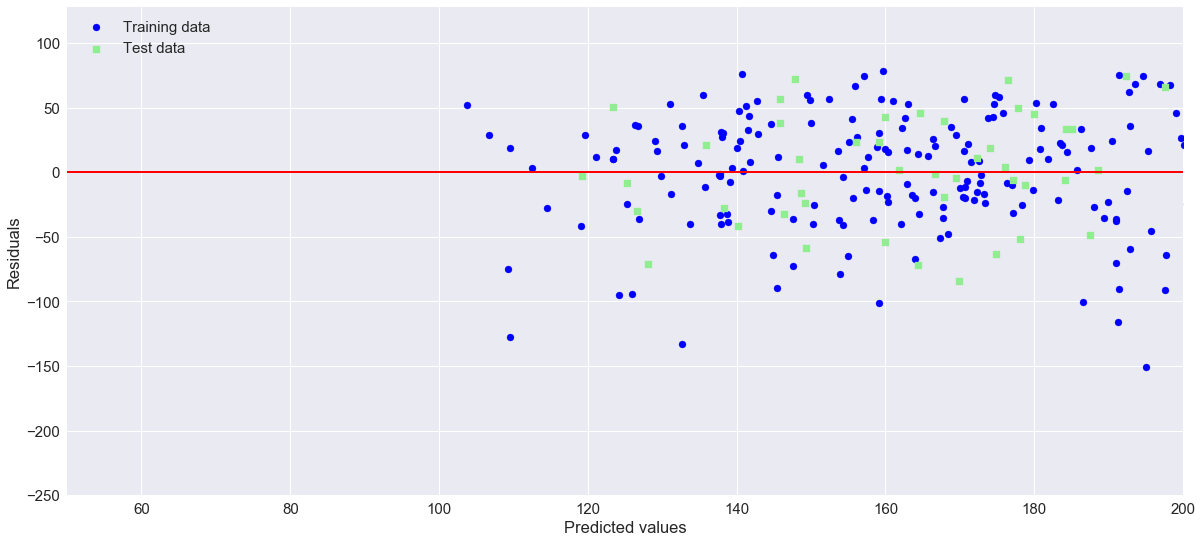

MSE train: 2415.862, test: 1662.000
R^2 train: 0.225, test: 0.129


In [83]:
###  Multi feature Linear regression with PCA

from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
index2=["red","blue","green","yellow","black","white","transitDuration"]
df1 = df3[index2]
X = df1[index2[:-1]].values
y=df1[index2[-1]].values

pca = PCA(n_components=0.9)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=50, xmax=200, lw=2, color='red')
plt.xlim([50, 200])
# plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()


print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

### Multi feature SGD linear regression

/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


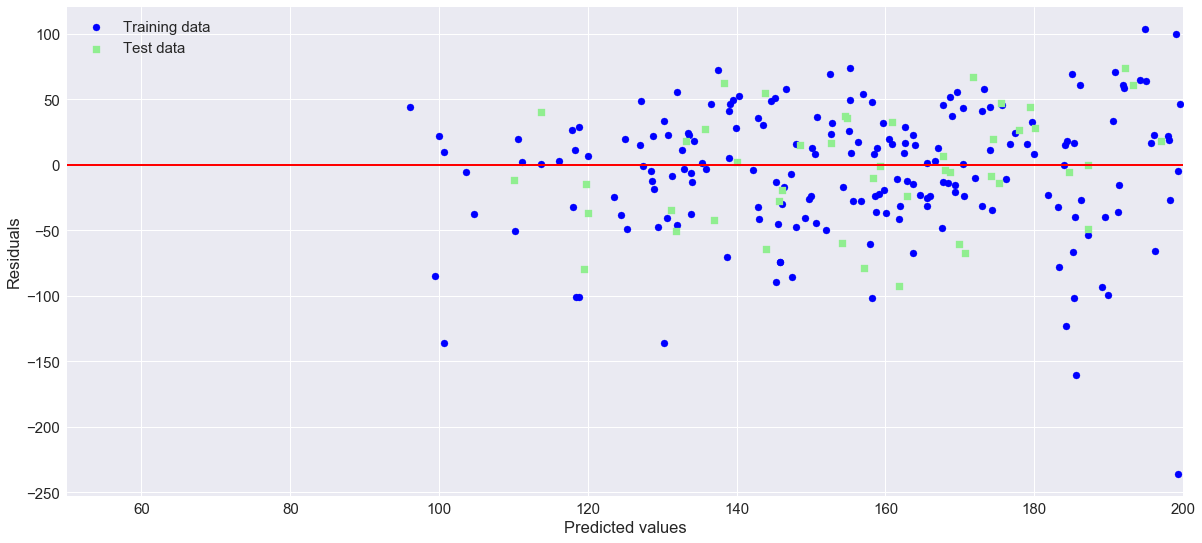

MSE train: 2451.402, test: 1702.317
R^2 train: 0.213, test: 0.108


In [84]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor

index2=["red","blue","green","yellow","black","white","transitDuration"]
df1 = df3[index2]
X = df1[index2[:-1]].values
y=df1[index2[-1]].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

slr = SGDRegressor(eta0 = 0.01, n_iter = 100, shuffle = True, warm_start = False)

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=50, xmax=200, lw=2, color='red')
plt.xlim([50, 200])
# plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()


print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


### Multi Feature SGD Linear Regression with PCA

/Users/apple/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


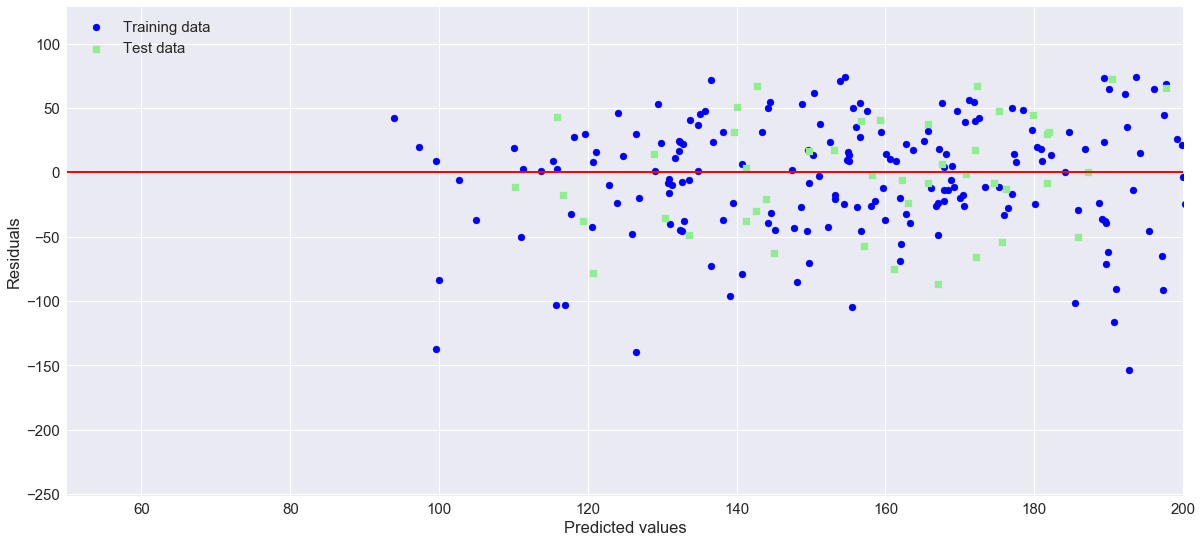

MSE train: 2441.958, test: 1683.815
R^2 train: 0.217, test: 0.117


In [85]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.decomposition import PCA

index2=["red","blue","green","yellow","black","white","transitDuration"]
df1 = df3[index2]
X = df1[index2[:-1]].values
y=df1[index2[-1]].values

pca = PCA(n_components = 0.9)
x = pca.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

slr = SGDRegressor(eta0 = 0.01, n_iter = 100, shuffle = True, warm_start = False)

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=50, xmax=200, lw=2, color='red')
plt.xlim([50, 200])
# plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()


print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))